In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# main function for runge-kutta
def second_runge_kutta(x,f,):
    J = np.array([[0,1],[-1,0]])
    dt = x[1]-x[0]
    big_f() # der
    solution = np.zeros(len(x))
    solution[0] = x[0] # setting initial condition
    
    
    x_prev = solution[0] # x_u
    for x_plus_1 in solution[1:x.size]: # iteratively defining approximations
        
        K1
        x_plus_1 = k1_calc() + x_prev
        # calculating appriximations
        x_prev = x_plus_1
def r(t):
    return np.array([np.cos(x)],[-1*np.sin(x)])

In [3]:
# generating derivatives
def derivatives_for_dressel(x, v):
    J = np.array([[0,1],[-1,0]])
    u = np.array([x,v])
    derivative = J@u
    return J@u

In [112]:
# heun's method
def trapezoid_approx(x0, v0, t):
    '''generates trapezod (heun's) approximation
            args:
                x0 (float/int): x(0)
                v0 (float/int): v(0)
                t (np array (floats)): domain for function
            returns:
                approximation of x(t)'''
    # "empty" arrays of x and v values, to be populated later
    x_values = np.zeros(len(t))
    v_values = np.zeros(len(t))
    
    # setting initial conditions and dt
    dt = t[1] - t[0]
    x_values[0] = x0
    v_values[0] = v0
    
    # populating x_values
    for i in range(1, len(t)):
        x_first = x_values[i-1] + derivatives_for_dressel(x_values[i-1], v_values[i-1])[0]
        v_first = v_values[i-1] + derivatives_for_dressel(x_values[i-1], v_values[i-1])[1]
        x_values[i] = x_first#x_values[i-1] + (dt/2)*(derivatives_for_dressel(x_values[i-1], v_values[i-1])[0]+derivatives_for_dressel(x_first, v_first)[0])
        v_values[i] = v_first#v_values[i-1] + (dt/2)*(derivatives_for_dressel(x_values[i-1], v_values[i-1])[1]+derivatives_for_dressel(x_first, v_first)[1])
    
    return x_values
    

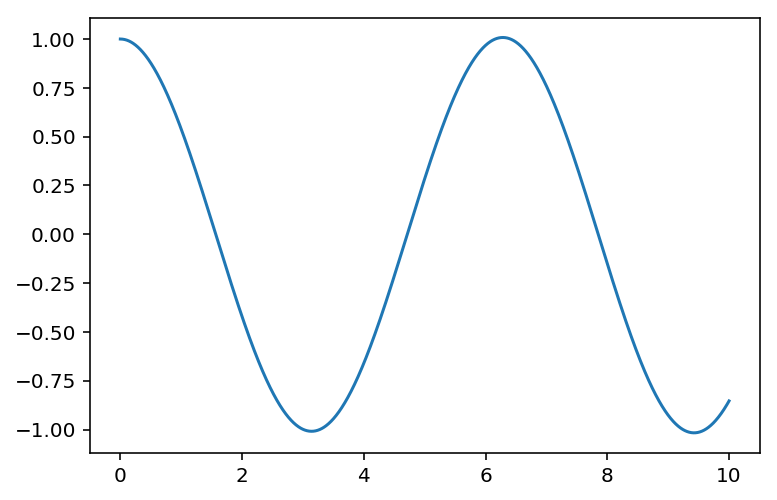

In [116]:
plt.plot(t, rungekutta4(1,0,t))

In [115]:
# calculating k-values for runge-kutta
def k1_calc(prev_x, prev_v, dt):
    '''generates k1 values for runge-kutta
    used internally in r-k functions'''
    k1_values = derivatives_for_dressel(prev_x, prev_v)
    return k1_values*dt

def k2_calc(prev_x, prev_v, dt):
    '''generates k2 values for runge-kutta
    used internally in r-k functions
    approximates gradient at x+dt/w v+dt/2'''
    k1_values = k1_calc(prev_x, prev_v, dt) # k1 values needed for computation of k2
    k2_values = k1_calc(prev_x+dt/2, prev_v+k1_values[1]/2,dt) # k1_calc() is x', v' = f[x,v]
    return k2_values

def k3_calc(prev_x, prev_v, dt):
    '''generates k2 values for runge-kutta
    used internally in r-k functions'''
    k1_values = k1_calc(prev_x, prev_v, dt)
    k2_values = k2_calc(prev_x, prev_v, dt)
    k3_values = k1_calc(prev_x+dt/2, prev_v+k2_values[1]/2,dt)
    return k3_values

def k4_calc(prev_x, prev_v, dt):
    '''generates k2 values for runge-kutta
    used internally in r-k functions'''
    k1_values = k1_calc(prev_x, prev_v, dt)
    k2_values = k2_calc(prev_x, prev_v, dt)
    k3_values = k3_calc(prev_x, prev_v, dt)
    k4_values = k1_calc(prev_x+dt, prev_v+k3_values[1],dt)
    return k4_values

def rungekutta2(x0, v0, t):
    '''generates 2nd runge-kutta approximation
            args:
                x0 (float/int): x(0)
                v0 (float/int): v(0)
                t (np array (floats)): domain for function
            returns:
                approximation of x(t)'''
    # "empty" arrays of x and v values, to be populated later
    x_values = np.zeros(len(t))
    v_values = np.zeros(len(t))
    
    # setting initial conditions and dt
    dt = t[1] - t[0]
    x_values[0] = x0
    v_values[0] = v0
    
    # populating x_values
    for i in range(1, len(t)):
        x_values[i] = x_values[i-1] + k2_calc(x_values[i-1],v_values[i-1],dt)[0]
        v_values[i] = v_values[i-1] + k2_calc(x_values[i-1],v_values[i-1],dt)[1]
    
    return x_values # this can be changed between x and v values depending on which function you wish to graph

def rungekutta4(x0, v0, t):
    '''generates 4th runge-kutta approximation
            args:
                x0 (float/int): x(0)
                v0 (float/int): v(0)
                t (np array (floats)): domain for function
            returns:
                approximation of x(t)'''
    # "empty" arrays of x and v values, to be populated later
    x_values = np.zeros(len(t))
    v_values = np.zeros(len(t))
    
    # setting initial conditions and dt
    dt = t[1] - t[0]
    x_values[0] = x0
    v_values[0] = v0
    
    # populating x_values and y_values with approximations
    for i in range(1, len(t)):
        x_values[i] = x_values[i-1] + (k1_calc(x_values[i-1], v_values[i-1], dt)[0]
                                    + 2*(k2_calc(x_values[i-1],v_values[i-1],dt)[0])
                                    + 2*(k3_calc(x_values[i-1],v_values[i-1],dt)[0])
                                    + (k4_calc(x_values[i-1], v_values[i-1], dt)[0]))/6
        
        v_values[i] = v_values[i-1] + (k1_calc(x_values[i-1], v_values[i-1], dt)[1]
                                    + 2*(k2_calc(x_values[i-1],v_values[i-1],dt)[1])
                                    + 2*(k3_calc(x_values[i-1],v_values[i-1],dt)[1])
                                    + (k4_calc(x_values[i-1], v_values[i-1], dt)[1]))/6
    
    return x_values # this can be changed between x and v values depending on which function you wish to graph

In [109]:
N = 2000
t = np.linspace(0,10,N)
dt = t[1]-t[0]
x = np.zeros(N)
v = np.zeros(N)

x[0] = 1
v[0] = 0

for i in range(1,N):
    deriv_vector = derivatives_for_dressel(x[i-1],v[i-1])
    x[i] = x[i-1]+dt*deriv_vector[0]
    v[i] = v[i-1]+dt*deriv_vector[1]